<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
##### Your Code Here #####
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np 

In [3]:
# train/test
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [5]:
print(X_train.shape, y_train.shape)

(404, 13) (404,)


In [0]:
# tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3)

model = Sequential()
model.add(Dense(10, input_dim=13, activation = 'selu'))
model.add(Dense(1, activation='linear'))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=15, 
          validation_data=(X_test,y_test),
          callbacks=[stop])

Epoch 1/15
13/13 [==============================] - 0s 7ms/step - loss: 2947.4038 - val_loss: 1970.7661
Epoch 2/15
13/13 [==============================] - 0s 4ms/step - loss: 2160.8953 - val_loss: 1356.2853
Epoch 3/15
13/13 [==============================] - 0s 4ms/step - loss: 1611.6306 - val_loss: 940.5709
Epoch 4/15
13/13 [==============================] - 0s 4ms/step - loss: 1229.4425 - val_loss: 684.1331
Epoch 5/15
13/13 [==============================] - 0s 4ms/step - loss: 972.4364 - val_loss: 552.7971
Epoch 6/15
13/13 [==============================] - 0s 4ms/step - loss: 815.4077 - val_loss: 480.8260
Epoch 7/15
13/13 [==============================] - 0s 4ms/step - loss: 711.1106 - val_loss: 434.9244
Epoch 8/15
13/13 [==============================] - 0s 4ms/step - loss: 630.3768 - val_loss: 403.3676
Epoch 9/15
13/13 [==============================] - 0s 4ms/step - loss: 570.3771 - val_loss: 379.0565
Epoch 10/15
13/13 [==============================] - 0s 4ms/step - loss: 522

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [16]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [19]:
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3)

# model, compile, fit
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, input_dim=28, activation="relu"))
model.add(Dense(15, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x=X_train, 
        y=y_train, 
        epochs=5, 
        validation_data=(X_test, y_test), 
        callbacks=[stop])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2383 - accuracy: 0.1944 - val_loss: 1.8396 - val_accuracy: 0.2278
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7426 - accuracy: 0.2722 - val_loss: 1.7117 - val_accuracy: 0.3176
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6301 - accuracy: 0.3256 - val_loss: 1.5713 - val_accuracy: 0.3515
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5632 - accuracy: 0.3479 - val_loss: 1.5371 - val_accuracy: 0.3614
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5316 - accuracy: 0.3583 - val_loss: 1.5165 - val_accuracy: 0.3618


In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_7 (Dense)              (None, 15)                165       
Total params: 8,015
Trainable params: 8,015
Non-trainable params: 0
_________________________________________________________________


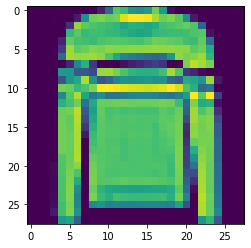

In [21]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.